**What is Data Augmentation?**

Data augmentation is a technique of artificially increasing the training set by creating modified copies of a dataset using existing data. It includes making minor changes to the dataset or using deep learning to generate new data points.

**Benefits of data augmentation**

* It increases the model's ability to generalize.
* It adds variability to the data and minimizes data overfitting.
* It saves on the cost of collecting and labeling additional data.
* It improves the accuracy of the deep learning model's predictions.

**Image Augmentation**

We know that the large datasets are a prerequisite for the success of deep neural networks in various applications.
*Image augmentation* generates similar but distinct training examples after a series of random changes to the training images, thereby expanding the size of the training set.

Alternatively, image augmentation can be motivated by the fact that random tweaks of training examples allow models to less rely on certain attributes, thereby improving their generalization ability.

For instance, we can crop an image in different ways to make the object of interest appear in different positions, thereby reducing the dependence of a model on the position of the object.

We can also adjust factors such as brightness and color to reduce a model's sensitivity to color. It is probably true
that image augmentation was indispensable for the success of AlexNet at that time.
In this session, we shall discuss this widely used technique in computer vision.


**Keras Image Augmentation API**

Like the rest of Keras, the image augmentation API is simple and powerful.

Keras provides the ImageDataGenerator class that defines the configuration for image data preparation and augmentation. This includes capabilities such as:

* Sample-wise standardization

* Feature-wise standardization

* ZCA whitening

* Random rotation, shifts, shear, and flips

* Dimension reordering

and so on.

We shall use the MNIST handwritten digit recognition task in these examples. To begin with, let’s take a look at the first nine images in the training dataset.

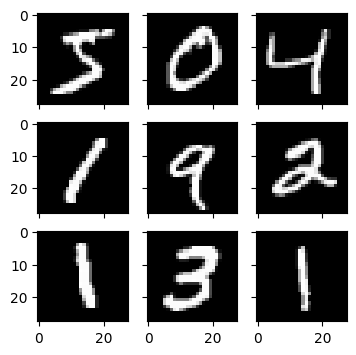

In [5]:
# Plot images
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# create a grid of 3x3 images
fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(4,4))
for i in range(3):
    for j in range(3):
        ax[i][j].imshow(X_train[i*3+j], cmap=plt.get_cmap("gray"))
# show the plot
plt.show()

**Feature Standardization**

It is also possible to standardize pixel values across the entire dataset. This is called feature standardization and mirrors the type of standardization often performed for each column in a tabular dataset.

You can perform feature standardization by setting the featurewise_center and featurewise_std_normalization arguments to True on the ImageDataGenerator class. These are set to False by default. However, the recent version of Keras has a bug in the feature standardization so that the mean and standard deviation is calculated across all pixels. If you use the fit() function from the ImageDataGenerator class, you will see an image similar to the one above:

-0.42407447 -0.04093817 2.8215446


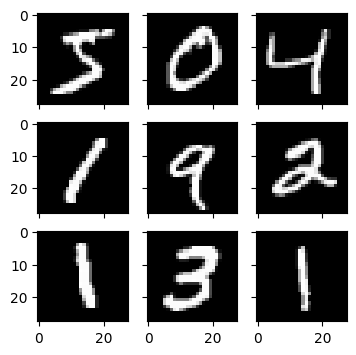

In [6]:
# Standardize images across the dataset, mean=0, stdev=1
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# define data preparation
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9, shuffle=False):
    print(X_batch.min(), X_batch.mean(), X_batch.max())
    # create a grid of 3x3 images
    fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(4,4))
    for i in range(3):
        for j in range(3):
            ax[i][j].imshow(X_batch[i*3+j], cmap=plt.get_cmap("gray"))
    # show the plot
    plt.show()
    break

In above, the minimum, mean, and maximum values from the batch has been printed.

 Each pixel should have a separate mean and standard deviation, and it should be computed across different samples but independent from other pixels in the same sample. We just need to replace the fit() function with our own computation:

-1.2742625 -0.028436039 17.46127


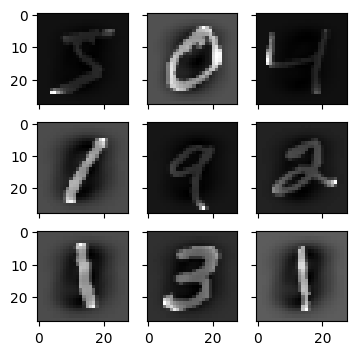

In [7]:
# Standardize images across the dataset, every pixel has mean=0, stdev=1
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# define data preparation
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
# fit parameters from data
datagen.mean = X_train.mean(axis=0)
datagen.std = X_train.std(axis=0)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9, shuffle=False):
    print(X_batch.min(), X_batch.mean(), X_batch.max())
    # create a grid of 3x3 images
    fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(4,4))
    for i in range(3):
        for j in range(3):
            ax[i][j].imshow(X_batch[i*3+j], cmap=plt.get_cmap("gray"))
    # show the plot
    plt.show()
    break

The minimum, mean, and maximum as printed now have a much wider range.
Using this example, we can see that the effect is different. It has darken and lighten the different digits.

**ZCA Whitening**

A whitening transform of an image is a linear algebraic operation that reduces the redundancy in the matrix of pixel images.

Less redundancy in the image is intended to better highlight the structures and features in the image to the learning algorithm.

ZCA provides better result than the PCA by preserving the original image dimension and making the transformed image look like of the original image.

Precisely, whitening converts each image into a white noise vector, i.e., each element in the vector has zero mean and unit standard derivation and is statistically independent of each other.

We can perform a ZCA whitening transform by setting the zca_whitening argument to True but due to the same issue as feature standardization, you must first zero-center the input data separately.

/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1451: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn(


-12.411183 0.0038707666 17.104145


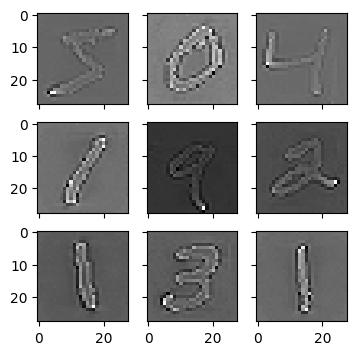

In [8]:
# ZCA Whitening
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# define data preparation
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True, zca_whitening=True)
# fit parameters from data
X_mean = X_train.mean(axis=0)
datagen.fit(X_train - X_mean)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train - X_mean, y_train, batch_size=9, shuffle=False):
    print(X_batch.min(), X_batch.mean(), X_batch.max())
    # create a grid of 3x3 images
    fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(4,4))
    for i in range(3):
        for j in range(3):
            ax[i][j].imshow(X_batch[i*3+j].reshape(28,28), cmap=plt.get_cmap("gray"))
    # show the plot
    plt.show()
    break

In this example, we can see the same general structure in the images and how the outline of each digit has been highlighted.

**Random Rotations**

Sometimes images in our sample data may have varying and different rotations in the scene.

We can train our model to better handle rotations of images by artificially and randomly rotating images from our dataset during training.

The example below creates random rotations of the MNIST digits up to 90 degrees by setting the rotation_range argument.

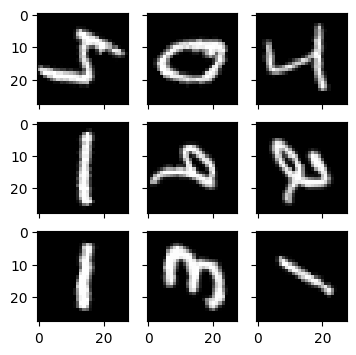

In [9]:
# Random Rotations
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# define data preparation
datagen = ImageDataGenerator(rotation_range=90)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9, shuffle=False):
    # create a grid of 3x3 images
    fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(4,4))
    for i in range(3):
        for j in range(3):
            ax[i][j].imshow(X_batch[i*3+j].reshape(28,28), cmap=plt.get_cmap("gray"))
    # show the plot
    plt.show()
    break

After executing this example, we can see that images have been rotated left and right up to a limit of 90 degrees. This is not helpful on this problem because the MNIST digits have a normalized orientation, but this transform might be of help when learning from photographs where the objects may have different orientations.

**Random Shifts**

Objects in our images may not be centered in the frame. They may be off-center in a variety of different ways.

We can train our deep learning network to expect and currently handle off-center objects by artificially creating shifted versions of our training data. Keras supports separate horizontal and vertical random shifting of training data by the width_shift_range and height_shift_range arguments.

11490434/11490434 [==============================] - 0s 0us/step


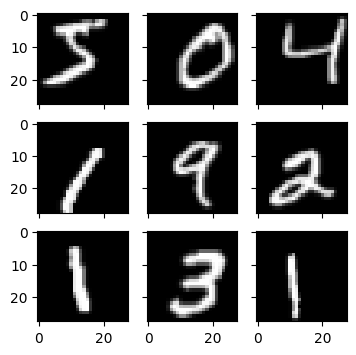

In [1]:
# Random Shifts
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# define data preparation
shift = 0.2
datagen = ImageDataGenerator(width_shift_range=shift, height_shift_range=shift)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9, shuffle=False):
    # create a grid of 3x3 images
    fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(4,4))
    for i in range(3):
        for j in range(3):
            ax[i][j].imshow(X_batch[i*3+j].reshape(28,28), cmap=plt.get_cmap("gray"))
    # show the plot
    plt.show()
    break

After executing this example, we have created shifted versions of the digits. Again, this is not required for MNIST as the handwritten digits are already centered, but you can see how this might be useful on more complex problem domains.

**Random Flips**

Another augmentation to our image data that can improve performance on large and complex problems is to create random flips of images in our training data.

Keras supports random flipping along both the vertical and horizontal axes using the vertical_flip and horizontal_flip arguments.

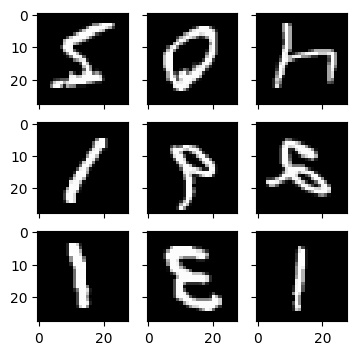

In [2]:
# Random Flips
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# define data preparation
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9, shuffle=False):
    # create a grid of 3x3 images
    fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(4,4))
    for i in range(3):
        for j in range(3):
            ax[i][j].imshow(X_batch[i*3+j].reshape(28,28), cmap=plt.get_cmap("gray"))
    # show the plot
    plt.show()
    break

After execution of this example, we can see the flipped digits. Here flipping operation on digits is not useful as they always have the correct left and right orientation, but this may be useful for problems with photographs of objects in a scene that can have a varied orientation.

**Important Tips:**

Below are some tips for getting the most from image data preparation and augmentation for deep learning.

**Review Dataset.** Take some time to review our dataset in great detail. Look at the images. Take note of image preparation and augmentations that might benefit the training process of our model, such as the need to handle different shifts, rotations, or flips of objects in the scene.

**Review Augmentations.** Review sample images after the augmentation has been performed. It is one thing to intellectually know what image transforms we are using; it is a very different thing to look at examples. Review images both with individual augmentations we are using as well as the full set of augmentations we plan to use. We may see ways to simplify or further enhance our model training process.

**Evaluate a Suite of Transforms.** We can try more than one image data preparation and augmentation scheme. Often we can be surprised by the results of a data preparation scheme we did not think would be beneficial.
